# 实验二：中国股市单因子资产定价模型的实证检验

## 单资产部分

### 读取个股数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm  # 用于统计建模和回归分析

In [2]:
stock_data = pd.read_csv(
    '../../实验二/assets/data/market/600519_daily.csv',
    encoding='gbk',
    usecols=[1,5,10],  # 只选择第2列(日期)、第6列(收盘价)和第11列(无风险收益率)
)

stock_data

,日期_Date,收盘价_Clpr,日无风险收益率_DRfRet
0,2001/8/27,35.55,0.000054
1,2001/8/28,36.86,0.000054
2,2001/8/29,36.38,0.000054
3,2001/8/30,37.10,0.000054
4,2001/8/31,37.01,0.000054
...,...,...,...
4232,2018/12/24,568.00,0.000088
4233,2018/12/25,565.79,0.000090
4234,2018/12/26,560.08,0.000091
4235,2018/12/27,563.00,0.000091


In [3]:
# 重命名列
stock_data.columns = ['date', 'close_price', 'rf']

# 删除所有的空值，inplace=True表示直接在原数据框上修改
stock_data.dropna(inplace=True)

stock_data

,date,close_price,rf
0,2001/8/27,35.55,0.000054
1,2001/8/28,36.86,0.000054
2,2001/8/29,36.38,0.000054
3,2001/8/30,37.10,0.000054
4,2001/8/31,37.01,0.000054
...,...,...,...
4232,2018/12/24,568.00,0.000088
4233,2018/12/25,565.79,0.000090
4234,2018/12/26,560.08,0.000091
4235,2018/12/27,563.00,0.000091


In [4]:
# 计算对数收益率
# log(当天close_price) - log(昨天close_price)
# periods=1 可以省略，默认就是1
stock_data['r'] = np.log(stock_data['close_price']) - np.log(stock_data['close_price'].shift(periods=1))

# 我们没有第0天的数据，所以第一天的数据会出现NAN，需要再次删除缺失值
stock_data.dropna(inplace=True)

stock_data

,date,close_price,rf,r
1,2001/8/28,36.86,0.000054,0.036187
2,2001/8/29,36.38,0.000054,-0.013108
3,2001/8/30,37.10,0.000054,0.019598
4,2001/8/31,37.01,0.000054,-0.002429
5,2001/9/3,36.99,0.000054,-0.000541
...,...,...,...,...
4232,2018/12/24,568.00,0.000088,0.001039
4233,2018/12/25,565.79,0.000090,-0.003898
4234,2018/12/26,560.08,0.000091,-0.010143
4235,2018/12/27,563.00,0.000091,0.005200


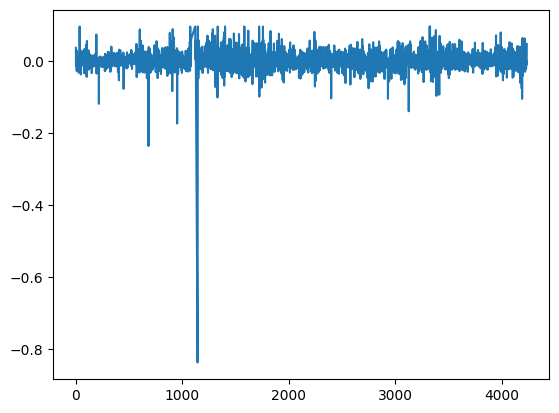

In [5]:
# 画图
plt.plot(stock_data['r'])

In [6]:
# 过滤极端值，仅保留[-0.1, 0.1]
mask = (stock_data['r'] >= -0.1) & (stock_data['r'] <= 0.1)

# 选出mask为真的行
stock_data = stock_data[mask]

stock_data

,date,close_price,rf,r
1,2001/8/28,36.86,0.000054,0.036187
2,2001/8/29,36.38,0.000054,-0.013108
3,2001/8/30,37.10,0.000054,0.019598
4,2001/8/31,37.01,0.000054,-0.002429
5,2001/9/3,36.99,0.000054,-0.000541
...,...,...,...,...
4232,2018/12/24,568.00,0.000088,0.001039
4233,2018/12/25,565.79,0.000090,-0.003898
4234,2018/12/26,560.08,0.000091,-0.010143
4235,2018/12/27,563.00,0.000091,0.005200


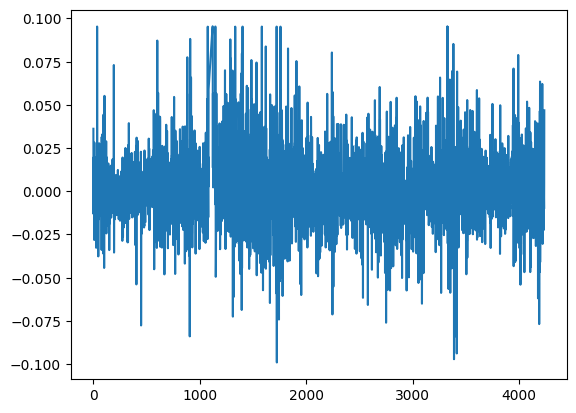

In [7]:
plt.plot(stock_data['r'])

### 读取指数数据

In [8]:
index_data = pd.read_csv(
    '../../实验二/assets/data/market/300_daily.csv',
    encoding='gbk',
    usecols=[1,5], # 只选择日期和收盘价两列
)

index_data

,交易日期_TrdDt,收盘价(元/点)_ClPr
0,2005/1/4,982.79
1,2005/1/5,992.56
2,2005/1/6,983.17
3,2005/1/7,983.96
4,2005/1/10,993.88
...,...,...
3397,2018/12/24,3038.20
3398,2018/12/25,3017.28
3399,2018/12/26,3002.03
3400,2018/12/27,2990.51


In [9]:
# 同理进行数据处理
index_data.columns = ['date', 'close_price']

index_data.dropna(inplace=True)

index_data['r'] = np.log(index_data['close_price']) - np.log(index_data['close_price'].shift(periods=1))

index_data.dropna(inplace=True)

index_data

,date,close_price,r
1,2005/1/5,992.56,0.009892
2,2005/1/6,983.17,-0.009505
3,2005/1/7,983.96,0.000803
4,2005/1/10,993.88,0.010031
5,2005/1/11,997.13,0.003265
...,...,...,...
3397,2018/12/24,3038.20,0.002901
3398,2018/12/25,3017.28,-0.006909
3399,2018/12/26,3002.03,-0.005067
3400,2018/12/27,2990.51,-0.003845


In [10]:
# 进行表的join操作
# left: stock_data['date', 'r', 'rf']
# right: stock_data['date', 'r']
merge_data = pd.merge(
    left=stock_data[['date', 'r', 'rf']],
    right=index_data[['date', 'r']],
    on='date',  # join stock_data, index_data on date相等
    how='inner', # 内连接
)

merge_data

,date,r_x,rf,r_y
0,2005/1/5,0.021442,0.000073,0.009892
1,2005/1/6,-0.017335,0.000071,-0.009505
2,2005/1/7,0.008163,0.000071,0.000803
3,2005/1/10,0.035932,0.000071,0.010031
4,2005/1/11,0.001306,0.000071,0.003265
...,...,...,...,...
3321,2018/12/24,0.001039,0.000088,0.002901
3322,2018/12/25,-0.003898,0.000090,-0.006909
3323,2018/12/26,-0.010143,0.000091,-0.005067
3324,2018/12/27,0.005200,0.000091,-0.003845


In [11]:
merge_data.columns=['date', 'r_stock', 'rf', 'r_index']
merge_data

,date,r_stock,rf,r_index
0,2005/1/5,0.021442,0.000073,0.009892
1,2005/1/6,-0.017335,0.000071,-0.009505
2,2005/1/7,0.008163,0.000071,0.000803
3,2005/1/10,0.035932,0.000071,0.010031
4,2005/1/11,0.001306,0.000071,0.003265
...,...,...,...,...
3321,2018/12/24,0.001039,0.000088,0.002901
3322,2018/12/25,-0.003898,0.000090,-0.006909
3323,2018/12/26,-0.010143,0.000091,-0.005067
3324,2018/12/27,0.005200,0.000091,-0.003845


In [12]:
# 取数据准备回归和可视化
r_stock = merge_data['r_stock'].values
rf = merge_data['rf'].values
r_index = merge_data['r_index'].values

Text(0, 0.5, '$r_i - r_f$')

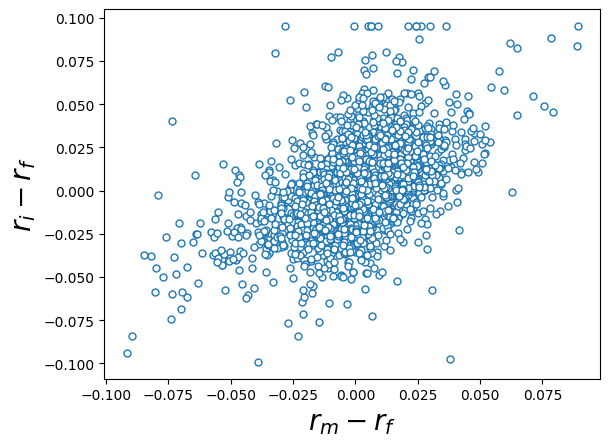

In [13]:
plt.plot(
    r_index - rf, # 市场超额收益率(x)
    r_stock - rf, # 个股超额收益率(y)
    'o', # 散点图
    ms=5, # 点大小
    mfc='w', # 点为白色white
    lw=2, # 线宽
)

plt.xlabel(r'$r_m - r_f$', fontsize=20)
plt.ylabel(r'$r_i - r_f$', fontsize=20)

In [14]:
# add_constant 为回归添加常数项，y = α + βx + ε
# 不加这个就变成了y = βx + ε
X = sm.add_constant(r_index - rf)
y = r_stock - rf

# (ri​−rf​)=α+β(rm​−rf​)+ϵ
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     1097.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          3.53e-208
Time:                        13:34:49   Log-Likelihood:                 8498.5
No. Observations:                3326   AIC:                        -1.699e+04
Df Residuals:                    3324   BIC:                        -1.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      3.391      0.001       0.000       0.002
x1             0.6159      0.019     33.125      0.000       0.579       0.652
==============================================================================
Omnibus:                      437.950   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.618
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       6.468   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""